<a href="https://colab.research.google.com/github/abel-keya/Prediction-using-Supervised-ML/blob/main/Final_Linear_Regression_Task1_Spark_Foundation_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Supervised ML

### Author: Abel Keya.
Copyright Abel Keya., 2021

**Not for distribution.**

## **Introduction**
>>
In this task i will demonstrate how to use Python Scikit-Learn library for machine learning to implement 
>>
regression functions. It is a simple linear regression involving two variables.

## Business Understanding

### **Simple Linear Regression**
>>
In this regression task it is requied to predict the percentage of marks that a student is expected to score 
>>
based upon the number of hours they studied


## Data Understanding

The dataset was provided by spark foundation and the  dataset had the following variables:
>>
* Hours -	 number of hours studied	
*	Score -	The score marks by the students


**Import the necessary Libraries**

In [91]:
# Import necessary libraries.
#
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pty
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the Dataset.

**Load the dataset and preview it using Pandas Profile Report**

In [92]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [93]:
# Get the size of the dataframe.
#
df.shape

(25, 2)

In [94]:
#previewing the top of the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [95]:
#previewing the bottom of the dataset
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [96]:
#checking the Data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

## Data Cleaning.

**Dealing with Null Values**

In [97]:
# Checking for null values.
#
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Check for duplicated Values**

In [98]:
# Geting the sum of the duplicated variables in our data.
#
df.duplicated().sum()

0

## Exploratory Data Analysis

> Plotting a bar plot representation of Score value counts

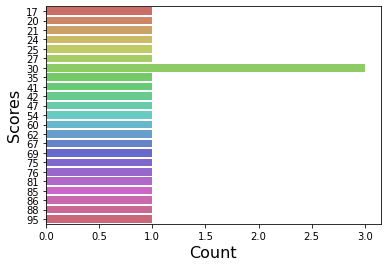

In [99]:
#visualizing the student score value counts
df.Scores.value_counts()
sns.countplot(y = 'Scores', data = df, palette = 'hls')
plt.xlabel("Count", fontsize=16)
plt.ylabel("Scores", fontsize=16)
plt.show()

**Observation**

The score of 30 has the highest frequency of appearance

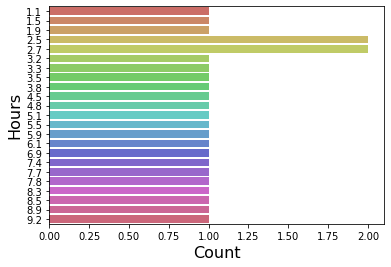

In [100]:
#visualizing the study Hours value counts
df.Hours.value_counts()
sns.countplot(y = 'Hours', data = df, palette = 'hls')
plt.xlabel("Count", fontsize=16)
plt.ylabel("Hours", fontsize=16)
plt.show()

**Observations**

2.5 and 2.7 have highest frequency of appearance

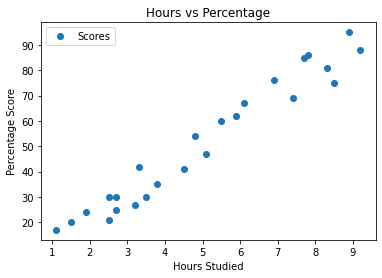

In [101]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Observation**

There is a positive linear relation between the number of hours studied and percentage of score.

## Implementing the Solution

**Linear Regression**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, log_loss, confusion_matrix,accuracy_score
from sklearn import metrics

In [103]:
# Split the dataset into features and labels.
#
X = df.drop(['Scores'], axis=1)
y = df['Scores']

# Split the data into train and test.
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


**Train the model**

In [104]:
lin_reg = LinearRegression(n_jobs=5, normalize=True)
# Standardize the data.
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=5, normalize=True)

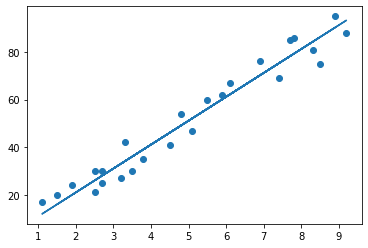

In [105]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Predictions**

In [106]:
# Comparing Actual vs Predicted
y_pred_lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})  
y_pred_lin_df 

,Actual,Predicted
15,95,90.279155
24,86,79.236617
14,17,11.977522
19,69,75.221148
13,42,34.062598
3,75,86.263686
21,54,49.120604
2,27,33.058731


**Visualising the results**

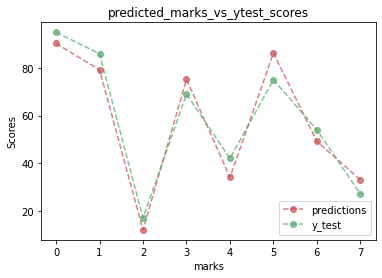

In [107]:
# plot between predicted scores and Y_test
import numpy as np
x_axis = np.array(range(0, y_pred_lin_df.shape[0]))
plt.plot(x_axis, y_pred_lin, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="y_test")
plt.xlabel('marks')
plt.ylabel('Scores')
plt.title('predicted_marks_vs_ytest_scores')
plt.legend(loc='lower right')
plt.show()
plt.savefig("predicted_marks_vs_ytest_scores.png")
plt.clf()
plt.close()

#Evaluating the model

In [108]:
y_pred_lin = lin_reg.predict(X_test)

# Mean Absolute Error
# Mean Squared Error
# Root Mean Squared Error
#
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))


Mean Absolute Error: 6.608383730582239
Mean Squared Error: 47.79342603239813
Root Mean Squared Error: 6.913278963878004


In [109]:
# R2 Score
print(f"R2 Score: {metrics.r2_score(y_test, y_pred_lin)*100}%")

R2 Score: 93.01887648961889%


#Follow up questions

a). Did we have the right data?

Yes

b). Do we need other data to answer our question?

Yes,need more data to improve model performance

c). Did we have the right question?

Yes